# Exploratory Data Analysis on Frog Dataset

### Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Importing datasets

In [2]:
#importing dataset 1
all_frog_data = 'C:/Users/Lillian/OneDrive/Desktop/DataSciencebootcamp'
data1 = pd.read_excel('all_frog_data.xlsx', parse_dates=['eventDate'])
data1

,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species
0,0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax
1,1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas
2,2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas
3,3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas
4,4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax
...,...,...,...,...,...,...,...,...,...
193786,193786,1322002619,NaT,Panama,Central America,Panamá,8.806900,-79.515300,Dendrobates Auratus
193787,193787,1319899134,1937-04-01 00:00:00,Panama,Central America,Panamá,8.806900,-79.515300,Dendrobates Auratus
193788,193788,1318901755,1937-04-05 00:00:00,Panama,Central America,Panamá,8.791700,-79.561100,Dendrobates Auratus
193789,193789,1322299951,2002-07-09 00:00:00,Honduras,Central America,Gracias a Dios,15.091100,-83.557800,Agalychnis Callidryas


In [3]:
#importing dataset 2
data2 = pd.read_excel("All_MLOut_new.xlsx")
pd.read_excel("All_MLOut_new.xlsx")
data2

,Unnamed: 0,gbifID,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,0,2574007008,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,1,3457021422,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,2,1571195309,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,3,2265778539,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,4,3407962690,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,193786,1322002619,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,193787,1319899134,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,193788,1318901755,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,193789,1322299951,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


### Merging Datsets

Since both data sets have some columns in common to get rid of duplicates we will drop the duplicate columns of data2 before we merge

In [4]:
#dropping duplicate columns in data2 
data1.drop(data1.columns.difference(['gbifID', 'eventDate', 'stateProvince']), axis = 1, inplace = True)
data1

,gbifID,eventDate,stateProvince
0,2574007008,2020-01-23 01:38:00,New South Wales
1,3457021422,2010-03-14 22:23:00,Puntarenas
2,1571195309,2014-04-11 19:51:57,Heredia
3,2265778539,2018-07-21 21:24:21,Puntarenas
4,3407962690,2021-10-29 13:57:00,Queensland
...,...,...,...
193786,1322002619,NaT,Panamá
193787,1319899134,1937-04-01 00:00:00,Panamá
193788,1318901755,1937-04-05 00:00:00,Panamá
193789,1322299951,2002-07-09 00:00:00,Gracias a Dios


In [5]:
#merged data
data = pd.merge(data2,
                data1[['gbifID','eventDate','stateProvince']],
                on ='gbifID', how='outer')
data.head(5)

,Unnamed: 0,gbifID,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,eventDate,stateProvince
0,0,2574007008,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336,2020-01-23 01:38:00,New South Wales
1,1,3457021422,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668,2010-03-14 22:23:00,Puntarenas
2,2,1571195309,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004,2014-04-11 19:51:57,Heredia
3,3,2265778539,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670,2018-07-21 21:24:21,Puntarenas
4,4,3407962690,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668,2021-10-29 13:57:00,Queensland


### Dropping unwanted columns

In [6]:
# dropping columns unmamed and key
Frogdata = data.drop(['Unnamed: 0', 'key', 'gbifID', 'occurrenceStatus' ] ,axis=1)
Frogdata.head(5)

,country,continent,decimalLatitude,decimalLongitude,species,ppt_mean,soil_mean,tmax_mean,tmin_mean,eventDate,stateProvince
0,Australia,Australia,-32.719457,152.159267,Litoria Fallax,96.00000,118.71667,23.830004,13.908336,2020-01-23 01:38:00,New South Wales
1,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,231.51666,131.88333,31.841667,21.111668,2010-03-14 22:23:00,Puntarenas
2,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,279.20000,51.70000,31.341671,22.455004,2014-04-11 19:51:57,Heredia
3,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,192.10000,171.81667,31.043331,20.061670,2018-07-21 21:24:21,Puntarenas
4,Australia,Australia,-26.714302,152.815096,Litoria Fallax,84.80000,111.61667,25.933338,13.801668,2021-10-29 13:57:00,Queensland


In [7]:
#getting data info
Frogdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   country           193791 non-null  object        
 1   continent         193791 non-null  object        
 2   decimalLatitude   193791 non-null  float64       
 3   decimalLongitude  193791 non-null  float64       
 4   species           193791 non-null  object        
 5   ppt_mean          161812 non-null  float64       
 6   soil_mean         161812 non-null  float64       
 7   tmax_mean         161812 non-null  float64       
 8   tmin_mean         161812 non-null  float64       
 9   eventDate         185026 non-null  datetime64[ns]
 10  stateProvince     193790 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 17.7+ MB


The columns soil_mean, ppt_mean, tmax_mean,tmin_mean, eventDate, and stateProvince have missing values we will replace them during the Univariate analysis

## Univariate Analysis 

### Univariate Analysis on Continent

In [8]:
#Getting the value_counts
Frogdata['continent'].value_counts()

Australia             188020
Central America         3931
Africa                  1737
unknown or invalid       103
Name: continent, dtype: int64

There are 3 continents, Australia has the highest and Africa has the least. There are status' with unknown or invalid and when we look at the state province of these values they are in Namibia hence we replace invalid or unknown with Africa we will do same for the country column

In [9]:
#replacing unknown or invalid with Africa
Frogdata1 = Frogdata.replace({'continent':{'unknown or invalid':'Africa'}})

In [10]:
Frogdata1['continent'].value_counts()

Australia          188020
Central America      3931
Africa               1840
Name: continent, dtype: int64

### Univariate Analysis on Country

In [11]:
#Getting the value_counts
Frogdata1['country'].value_counts()

Australia             188020
Costa Rica              2258
South Africa            1348
Panama                   755
Mexico                   455
Honduras                 144
Colombia                 135
Nicaragua                133
Zimbabwe                 110
Mozambique               107
unknown or invalid       103
Eswatini                  62
Botswana                  41
Zambia                    32
Guatemala                 30
Belize                    21
Malawi                    18
Lesotho                   17
Angola                     2
Name: country, dtype: int64

As we did for the continent column we will replace the invalid or unknown values with Namibia as per data from their state province

In [12]:
#replacing unknown or invalid with Namibia
Frog_data = Frogdata1.replace({'country':{'unknown or invalid':'Namibia'}})

In [13]:
Frog_data['country'].value_counts()

Australia       188020
Costa Rica        2258
South Africa      1348
Panama             755
Mexico             455
Honduras           144
Colombia           135
Nicaragua          133
Zimbabwe           110
Mozambique         107
Namibia            103
Eswatini            62
Botswana            41
Zambia              32
Guatemala           30
Belize              21
Malawi              18
Lesotho             17
Angola               2
Name: country, dtype: int64

There are 19 counties, Australia has the highest as indicated in the continent analysis and Angola has the least which is in Africa

### Univariate analysis on species

In [14]:
#Getting value_counts of species column
Frog_data['species'].value_counts()

Crinia Signifera             126657
Litoria Fallax                47332
Crinia Glauerti                9393
Ranoidea Australis             4097
Agalychnis Callidryas          2212
Dendrobates Auratus            1718
Xenopus Laevis                 1139
Chiromantis Xerampelina         702
Austrochaperina Pluvialis       541
Name: species, dtype: int64

In total there are 9 species of frog.

The specie with the highest number is Crinia Signifera  and the lowest is Austrochaperina Pluvialis. 

### Univariate analysis on stateProvince

In [15]:
#Getting value_count for staeProvince column
Frog_data['stateProvince'].value_counts()

New South Wales      99480
Victoria             37093
South Australia      16786
Queensland           13397
Western Australia    10242
                     ...  
Zambezi                  1
Midlands                 1
Ghanzi                   1
Karas                    1
Qacha's Nek              1
Name: stateProvince, Length: 141, dtype: int64

In [16]:
#dropping the null value
Frog_Data3 = Frog_data.dropna( how = 'any',
                              subset=['stateProvince'])

In [17]:
Frog_Data3['stateProvince'].isnull().sum()

0

### Univariate analysis on pppt_mean

In [18]:
#getting the sum of null values
Frog_Data3['ppt_mean'].isnull().sum()

31979

Lets plot a histogram of the ppt_mean column to find the best method to replace the null values

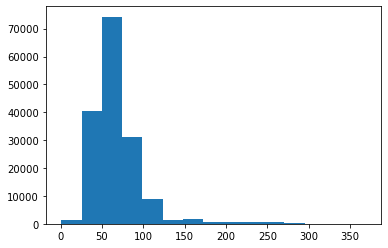

In [19]:
#plotting histogram to see the distribution of the data
plt.hist(Frog_Data3['ppt_mean'], bins = 15)
plt.show()

Most of the frogs have a ppt_mean in the ranges of 60

### Univariate analysis on soil_mean

In [20]:
#getting the value count of soil_mean column
Frog_Data3['soil_mean'].value_counts()

47.416668     16484
43.233334      6095
55.350000      5154
16.983334      3340
12.233334      2901
              ...  
132.883330        1
11.350000         1
4.066667          1
18.316668         1
24.650000         1
Name: soil_mean, Length: 1629, dtype: int64

In [21]:
#getting sum of null values of soil_mean column
Frog_Data3['soil_mean'].isnull().sum()

31979

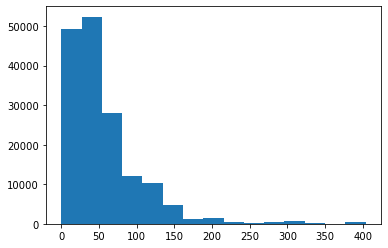

In [22]:
#plotting histogram to see the distribution of the data
plt.hist(Frog_Data3['soil_mean'], bins = 15)
plt.show()

The soil_mean with the most species is 35.316

### Univariate analysis on tmax_mean

In [23]:
# getting value_counts of tmax_mean column
Frog_Data3['tmax_mean'].value_counts()

24.218334    16484
24.130001     6095
24.736670     5154
20.701666     3340
20.821669     2838
             ...  
33.328335        1
35.143330        1
27.205004        1
33.326668        1
29.818333        1
Name: tmax_mean, Length: 1998, dtype: int64

In [24]:
#getting the sum of null values
Frog_Data3['tmax_mean'].isnull().sum()

31979

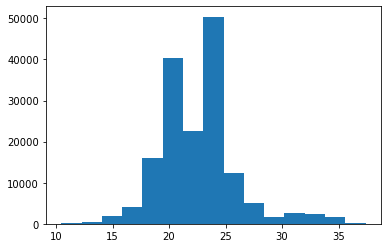

In [25]:
#plotting histogram to see the distribution of the data
plt.hist(Frog_Data3['tmax_mean'], bins = 15)
plt.show()

### Univariate analysis on tmin_mean

In [26]:
# getting value_counts of tmin_mean column
Frog_Data3['tmin_mean'].value_counts()

12.721667    16484
12.366668     6095
13.008334     5154
10.106669     3340
10.681668     2838
             ...  
19.221668        1
18.168335        1
20.785002        1
19.363337        1
14.356669        1
Name: tmin_mean, Length: 1968, dtype: int64

In [27]:
#getting the sum of null values
Frog_Data3['tmin_mean'].isnull().sum()

31979

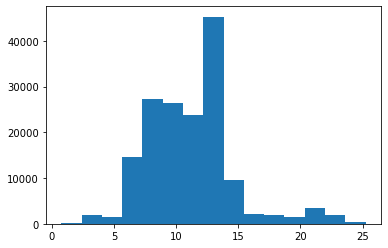

In [28]:
#plotting histogram to see the distribution of the data
plt.hist(Frog_Data3['tmin_mean'], bins =15)
plt.show()

From the univariate analysis of the column we can see that the columns ppt_mean and soil_mean have a right skewed distribution hence we will replce their missing values with the median and replace that of tmax_mean and tmin_mean with the mean as their diustribution is normal

In [29]:
#replacing mising values 
medians = Frog_Data3.groupby(['species', 'country'])[['ppt_mean', 'soil_mean']].transform('median')
Frog_Data3[['ppt_mean', 'soil_mean']] = Frog_Data3[['ppt_mean', 'soil_mean']].fillna(medians)

C:\Users\Lillian\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
#replacing mising values
means = Frog_Data3.groupby(['species', 'country'])[['tmax_mean', 'tmin_mean']].transform('mean')
Frog_Data3[['tmax_mean', 'tmin_mean']] = Frog_Data3[['tmax_mean', 'tmin_mean']].fillna(means)

In [31]:
Frog_Data3.isnull().sum()

country                0
continent              0
decimalLatitude        0
decimalLongitude       0
species                0
ppt_mean               0
soil_mean              0
tmax_mean              0
tmin_mean              0
eventDate           8765
stateProvince          0
dtype: int64

The missing values have been replaced in the columns 'ppt_mean', 'soil_mean', 'tmax_mean', 'tmin_mean'

### Univariate analysis on eventDate

In [32]:
#getting the value_count of eventDate column
Frog_Data3['eventDate'].value_counts()

2010-12-17 00:00:00    1712
2010-11-01 00:00:00     894
2010-12-18 00:00:00     800
2010-12-01 00:00:00     756
2010-11-05 00:00:00     669
                       ... 
2021-04-09 20:36:52       1
2017-01-13 11:25:00       1
2020-01-17 10:46:30       1
2018-02-11 03:31:00       1
1924-03-28 00:00:00       1
Name: eventDate, Length: 18147, dtype: int64

In [33]:
#getting the sum of null values 
Frog_Data3['eventDate'].isnull().sum()

8765

# Multivariate analysis

1. Finding the population of species per countries

In [34]:
Frog_Data3.groupby(['species'])['country'].value_counts(ascending=False)

species                    country     
Agalychnis Callidryas      Costa Rica        1234
                           Mexico             454
                           Panama             221
                           Honduras           144
                           Nicaragua          108
                           Guatemala           30
                           Belize              21
Austrochaperina Pluvialis  Australia          541
Chiromantis Xerampelina    South Africa       397
                           Zimbabwe            85
                           Mozambique          79
                           Eswatini            38
                           Botswana            37
                           Zambia              29
                           Namibia             23
                           Malawi              14
Crinia Glauerti            Australia         9393
Crinia Signifera           Australia       126657
Dendrobates Auratus        Costa Rica        1023
          

In [35]:
Frog_Data3.groupby(['species'])['continent'].value_counts(ascending=False)

species                    continent      
Agalychnis Callidryas      Central America      2212
Austrochaperina Pluvialis  Australia             541
Chiromantis Xerampelina    Africa                702
Crinia Glauerti            Australia            9393
Crinia Signifera           Australia          126657
Dendrobates Auratus        Central America      1717
Litoria Fallax             Australia           47332
Ranoidea Australis         Australia            4097
Xenopus Laevis             Africa               1138
                           Central America         1
Name: continent, dtype: int64

1. The species are specific for each continent
2. In africa the species opresent are Xenopus Laevis, Chiromantis Xerampelina . with **Xenopus Laevis** being the highest
3. Species present in Australia are Austrochaperina Pluvialis, Crinia Glauerti, Crinia Signifera, Litoria Fallax, Ranoidea Australis with **Litoria Fallax** being the highest
4. Species present in Central America are Agalychnis Callidryas, Dendrobates Auratus, with the highest being **Agalychnis Callidryas**

2. Finding distribution of species across the years

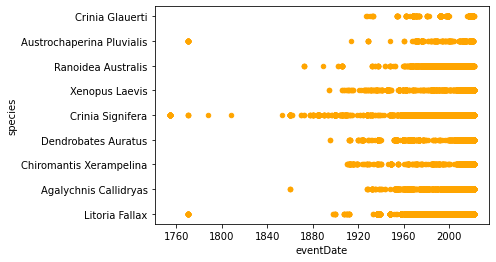

In [36]:
#plotting a scatter plot of eventdate per specie
Frog_Data3.plot.scatter(x = 'eventDate', y = 'species',  c = 'orange');

Most of the species occur in the years 1960 to the 2000's

3. Finding out the distribution of ppt_mean per speacie

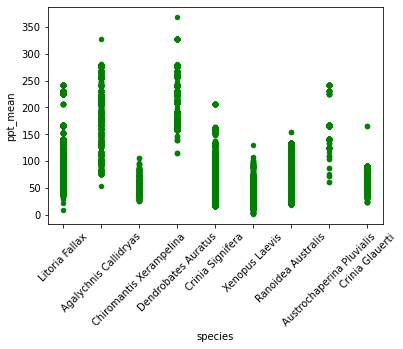

In [37]:
Frog_Data3.plot.scatter(x = 'species', y = 'ppt_mean',  c = 'green');
plt.xticks(rotation=45)
plt.show()

3. Finding out the distribution of soil_mean per specie

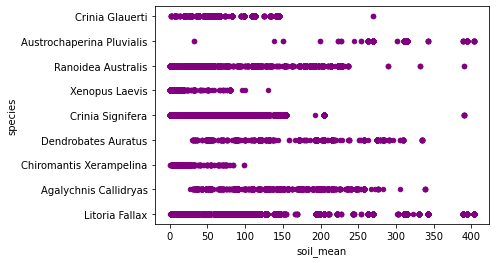

In [38]:
Frog_Data3.plot.scatter(x = 'soil_mean', y = 'species',  c = 'purple');

Almost all speies have a soil mean in the arange of 0 and 200 except for Austrochaperina Plauvialis which has soil mean quite dispersed

4. Finding out the distribution of tmax_mean per specie

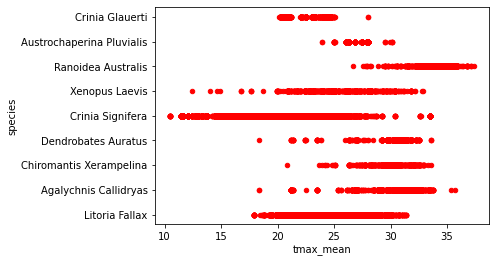

In [39]:
Frog_Data3.plot.scatter(x = 'tmax_mean', y = 'species', c = 'red');

Crinia Signifera which has the highest number of recorded species has a tmax_mean ranging from 10 to 35 while the others have a tmax_mean just within a small range

5. Finding out the distribution of tmin_mean per specie

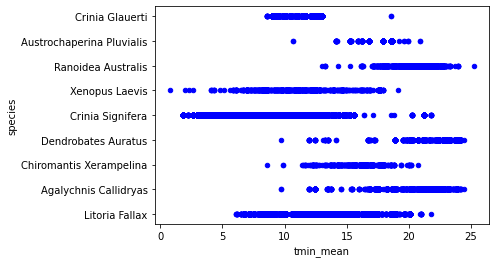

In [40]:
Frog_Data3.plot.scatter(x = 'tmin_mean', y = 'species', c = 'blue');

6. Findig the realtion between soil_mean and ppt_mean

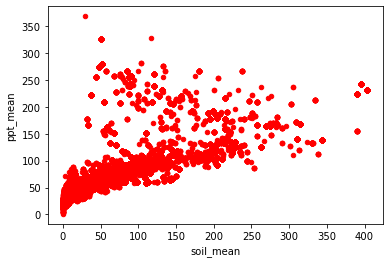

In [41]:
Frog_Data3.plot.scatter(x = 'soil_mean', y = 'ppt_mean',  c = 'red');

6. Findig the realtion between tmax_mean and tmin_mean

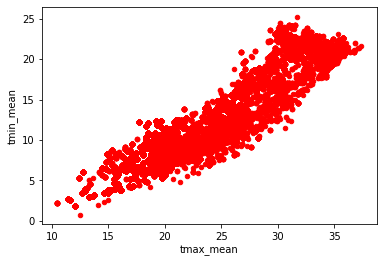

In [42]:
Frog_Data3.plot.scatter(x = 'tmax_mean', y = 'tmin_mean',  c = 'red');

there is a linear reltionship between tmax_mean and tmin_mean

6. Findig the realtion between tmax_mean and soil_mean

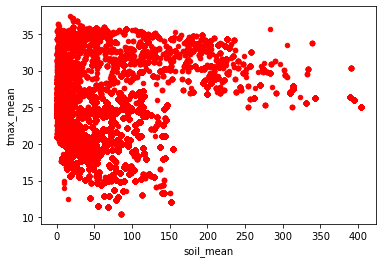

In [43]:
Frog_Data3.plot.scatter(x = 'soil_mean', y = 'tmax_mean',  c = 'red');

Most species in a high soil_mean have a high tmax_ mean . also species with low soil_mean can have a high or low tmax_mean

7. Findig the realtion between tmax_mean and ppt_mean

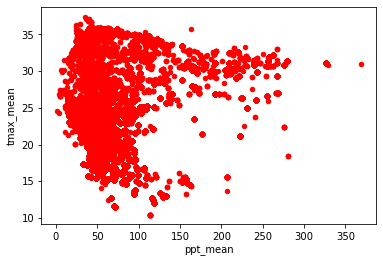

In [44]:
Frog_Data3.plot.scatter(x = 'ppt_mean', y = 'tmax_mean',  c = 'red');

We can see that for most of the species have 0 and 150 and some outliers  with higher ppt_mean

Groupby the features and plotting by species

In [45]:
Frog_Data3.groupby(['species'])[['ppt_mean', 'soil_mean']].sum()

,ppt_mean,soil_mean
species,,
Agalychnis Callidryas,4.434278e+05,2.758776e+05
Austrochaperina Pluvialis,9.033123e+04,1.673042e+05
Chiromantis Xerampelina,3.628890e+04,1.379532e+04
Crinia Glauerti,5.114931e+05,5.671159e+05
Crinia Signifera,7.700863e+06,5.245758e+06
Dendrobates Auratus,3.708973e+05,2.432293e+05
Litoria Fallax,3.619518e+06,3.366192e+06
Ranoidea Australis,3.510619e+05,4.964126e+05
Xenopus Laevis,4.501405e+04,1.108302e+04


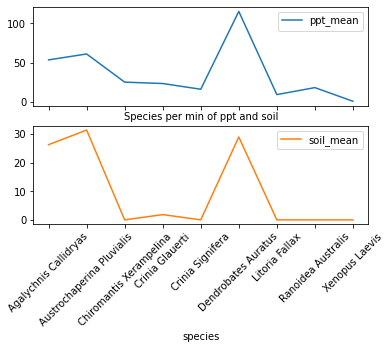

In [46]:
Frog_Data3.groupby(['species'])[['ppt_mean', 'soil_mean']].min().plot(kind='line', subplots=True)
plt.title('Species per min of ppt and soil', fontsize=10)
plt.xticks(rotation=45)
plt.show()

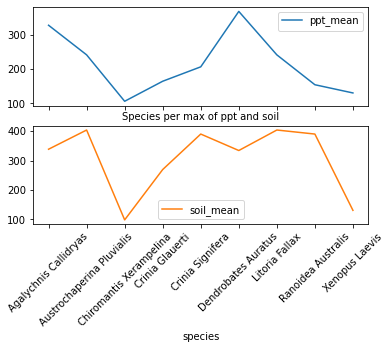

In [47]:
Frog_Data3.groupby(['species'])[['ppt_mean', 'soil_mean']].max().plot(kind='line', subplots=True)
plt.title('Species per max of ppt and soil', fontsize=10)
plt.xticks(rotation=45)
plt.show()

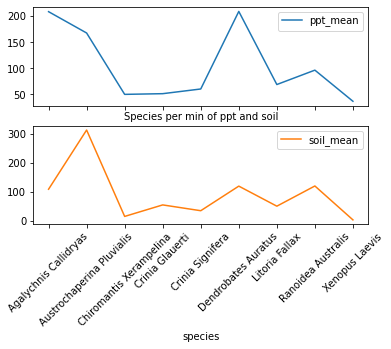

In [48]:
Frog_Data3.groupby(['species'])[['ppt_mean', 'soil_mean']].median().plot(kind='line', subplots=True)
plt.title('Species per min of ppt and soil', fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [49]:
corr = Frog_Data3.corr()
corr.style.background_gradient()

,decimalLatitude,decimalLongitude,ppt_mean,soil_mean,tmax_mean,tmin_mean
decimalLatitude,1.000000,-0.769027,0.711744,0.492328,0.733420,0.750964
decimalLongitude,-0.769027,1.000000,-0.539566,-0.191008,-0.380660,-0.450078
ppt_mean,0.711744,-0.539566,1.000000,0.732101,0.365060,0.521463
soil_mean,0.492328,-0.191008,0.732101,1.000000,0.351172,0.477221
tmax_mean,0.733420,-0.380660,0.365060,0.351172,1.000000,0.914388
tmin_mean,0.750964,-0.450078,0.521463,0.477221,0.914388,1.000000


From the correlation matrix we can see that not all the columns are related . We will dropping the following columns [decimalLatitude, decimalLongitude, 'stateProvince', 'country'

In [50]:
#Dropping unwanted columns for Machine learning model
Frog_Data4 = Frog_Data3.drop(['stateProvince', 'country', 'decimalLatitude', 'decimalLongitude','eventDate'] ,axis=1)
Frog_Data4.head(5)

,continent,species,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,Australia,Litoria Fallax,96.00000,118.71667,23.830004,13.908336
1,Central America,Agalychnis Callidryas,231.51666,131.88333,31.841667,21.111668
2,Central America,Agalychnis Callidryas,279.20000,51.70000,31.341671,22.455004
3,Central America,Agalychnis Callidryas,192.10000,171.81667,31.043331,20.061670
4,Australia,Litoria Fallax,84.80000,111.61667,25.933338,13.801668


Encoding categorical columns for Machine learning model

In [51]:
# Encoding Species column
Frog_Species_Data = Frog_Data3
label_encoder = preprocessing.LabelEncoder()
Frog_Species_Data['species']= label_encoder.fit_transform(Frog_Species_Data['species'])  
Frog_Species_Data['species'].unique()

C:\Users\Lillian\AppData\Local\Temp/ipykernel_7636/1310264801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frog_Species_Data['species']= label_encoder.fit_transform(Frog_Species_Data['species'])


array([6, 0, 2, 5, 4, 8, 7, 1, 3])

In [52]:
# Encoding continent column
one_hot = OneHotEncoder()

In [53]:
encoded = one_hot.fit_transform(Frog_Species_Data[['continent']])

In [54]:
Frog_Species_Data[one_hot.categories_[0]] = encoded.toarray()

C:\Users\Lillian\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [55]:
Frog_Species_Data.head(5)

,country,continent,decimalLatitude,decimalLongitude,species,ppt_mean,soil_mean,tmax_mean,tmin_mean,eventDate,stateProvince,Africa,Australia,Central America
0,Australia,Australia,-32.719457,152.159267,6,96.00000,118.71667,23.830004,13.908336,2020-01-23 01:38:00,New South Wales,0.0,1.0,0.0
1,Costa Rica,Central America,8.496999,-83.318613,0,231.51666,131.88333,31.841667,21.111668,2010-03-14 22:23:00,Puntarenas,0.0,0.0,1.0
2,Costa Rica,Central America,10.450801,-84.068659,0,279.20000,51.70000,31.341671,22.455004,2014-04-11 19:51:57,Heredia,0.0,0.0,1.0
3,Costa Rica,Central America,9.756705,-84.613363,0,192.10000,171.81667,31.043331,20.061670,2018-07-21 21:24:21,Puntarenas,0.0,0.0,1.0
4,Australia,Australia,-26.714302,152.815096,6,84.80000,111.61667,25.933338,13.801668,2021-10-29 13:57:00,Queensland,0.0,1.0,0.0


In [56]:
Final_Data = Frog_Species_Data.drop(['continent','country', 'stateProvince', 'eventDate' ], axis=1)
Final_Data.head(5)

,decimalLatitude,decimalLongitude,species,ppt_mean,soil_mean,tmax_mean,tmin_mean,Africa,Australia,Central America
0,-32.719457,152.159267,6,96.00000,118.71667,23.830004,13.908336,0.0,1.0,0.0
1,8.496999,-83.318613,0,231.51666,131.88333,31.841667,21.111668,0.0,0.0,1.0
2,10.450801,-84.068659,0,279.20000,51.70000,31.341671,22.455004,0.0,0.0,1.0
3,9.756705,-84.613363,0,192.10000,171.81667,31.043331,20.061670,0.0,0.0,1.0
4,-26.714302,152.815096,6,84.80000,111.61667,25.933338,13.801668,0.0,1.0,0.0


In [57]:
sum(Final_Data.duplicated())

85692

In [58]:
X = Final_Data.iloc[:,Final_Data.columns != 'species']
y = Final_Data.species

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [60]:
scaler = StandardScaler(with_mean=False, with_std=False)
scaler.fit(X)

StandardScaler(with_mean=False, with_std=False)

In [61]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [91]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
y_predict = classifier.predict(X_test)

In [96]:
print(y_predict)

[4 4 4 ... 6 4 4]


In [94]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[  403     0     0     0     0    39     0     0     0]
 [    0    97     0     0     0     0    10     1     0]
 [    0     0   126     0     0     0     0     0    14]
 [    0     0     0  1878     0     0     1     0     0]
 [    0     0     0     2 23960     0  1369     0     0]
 [   59     0     0     0     0   284     0     0     0]
 [    0     9     0     0  1353     0  8102     3     0]
 [    0     0     0     0     1     0     5   814     0]
 [    1     0     9     0     0     0     0     0   218]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       442
           1       0.92      0.90      0.91       108
           2       0.93      0.90      0.92       140
           3       1.00      1.00      1.00      1879
           4       0.95      0.95      0.95     25331
           5       0.88      0.83      0.85       343
           6       0.85      0.86      0.85      9467
           7       1.00      0.99      0.99       820